{'44': '12', '14': '16', '8': '4', '2': '14', '38': '14', '32': '13', '31': '17', '25': '13', '37': '13', '36': '18', '34': '17', '9': '17', '30': '19', '3': '7', '11': '10', '5': '12', '10': '12', '20': '7', '41': '12', '40': '13', '29': '3', '35': '5', '6': '14', '43': '11', '27': '10', '23': '17', '16': '2', '4': '9', '22': '10', '18': '17', '42': '14', 'store_nbr': 'station_nbr', '33': '3', '45': '16', '28': '7', '13': '6', '39': '8', '12': '11', '17': '20', '1': '1', '26': '17', '24': '9', '7': '6', '21': '3', '19': '15', '15': '13'}
4617601
4617601
Item  9
['2012-01-01', '1', '9', '29']
['2012-01-02', '1', '9', '60']
['2012-01-03', '1', '9', '15']
['2012-01-04', '1', '9', '20']
['2012-01-05', '1', '9', '16']
['2012-01-06', '1', '9', '12']
['2012-01-07', '1', '9', '2']
['2012-01-08', '1', '9', '22']
['2012-01-09', '1', '9', '50']
['2012-01-10', '1', '9', '25']
['2012-01-11', '1', '9', '26']
['2012-01-12', '1', '9', '32']
['2012-01-13', '1', '9', '29']
['2012-01-14', '1', '9', '48'

/Users/adityanakai/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


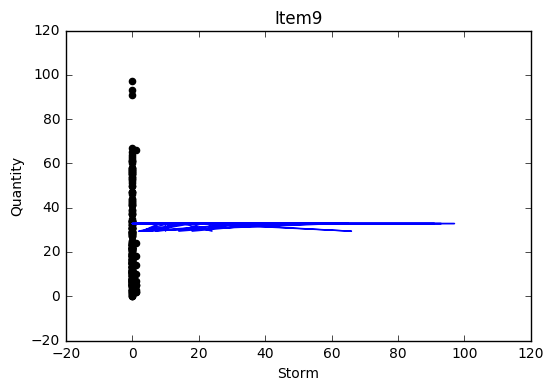

In [1]:
import csv
keys_csv = open('key.csv', 'rt')
keys=csv.reader(keys_csv)
store_station={}
for store,station in keys:
   store_station[store]=station

print(store_station)
weather_csv = open('weather.csv', 'rt')
weather=csv.reader(weather_csv)
date_station_snowfall_rain={}
for w in weather:
   stationnumber=w[0]
   date=w[1]
   snowfall=w[13]
   rain=w[14]
   date_station_snowfall_rain[date+"_"+stationnumber]=snowfall+"_"+rain

train_csv = open('train.csv', 'rt')
train=csv.reader(train_csv)
train_date_store_item_units={}
count=0
for date,store_nbr,item_nbr,units in train:
       train_date_store_item_units[date+"_"+store_nbr+"_"+item_nbr]=units


print(len(train_date_store_item_units))
#Final
date_store_station_item_quantity={}
def calculateResults(preds,dev_labels):
   correct, total = 0, 0
   for pred, label in zip(preds, dev_labels):
       if pred == label:
           correct += 1
       total += 1
   
   return correct/total
train_csv1 = open('train.csv', 'rt')
train1=csv.reader(train_csv1)
train=[]
for t in train1:
   train.append(t)
print(len(train))

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

for i in range(9,10):
   item =i
   date=[]
   quantity=[]
   snowfall=[]
   rain=[]
   print("Item ",item)
   for t in train:
       #Veryify item number
       #hard coding store number 1
       #date    store_nbr    item_nbr    units
       if str(item)==t[2] and t[1]==str(1):
           #adding the date
           print(t)
           date.append(t[0])
           #store_station[store_number] gives weather data
           snowfall.append(date_station_snowfall_rain[t[0]+"_"+store_station[t[1]]].split("_")[0])
           rain.append(date_station_snowfall_rain[t[0]+"_"+store_station[t[1]]].split("_")[1])
           #appending quantity
           #print(t)
           quantity.append(t[3])
       count+=1
   #print(“snowfall:“,snowfall)
   #print(“rain:“,rain)
   rain_date={}
   storm=[]
   sold=[]
   for r in zip(rain,date,quantity):
       print(r)
       try:
           if float(r[0])>0.5:
               storm.append(float(1))
               sold.append(int(r[2]))
           else:
               storm.append(float(0))#not a storm
               sold.append(int(r[2]))
       except ValueError:
           continue
   #print(“quantity:“,quantity)

   regr = linear_model.LinearRegression()
   print(len(storm))
   limit=500
   storm_train=np.array(storm[:limit])
   storm_test=np.array(storm[limit:])
   sold_train=np.array(sold[:limit])
   sold_test=np.array(sold[limit:])
   
   storm_train = storm_train[:, np.newaxis]
   storm_test = storm_test[:, np.newaxis]
   sold_train = sold_train[:, np.newaxis]
   sold_test = sold_test[:, np.newaxis]
   # Train the model using the training sets
   regr.fit(storm_train, sold_train)
   preds=regr.predict(storm_test)
   
   print("The accuracy is:", calculateResults(preds,sold_test))

   # Plot outputs
   plt.scatter(storm_test, sold_test,  color='black')
   plt.plot(sold_test, regr.predict(storm_test), color='blue',
            linewidth=1)
   plt.xlabel("Storm")
   plt.ylabel("Quantity")
   #plt.xticks(())
   plt.title("Item"+str(item))
   #plt.yticks(())

   plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from random import shuffle

train_no_header = train[1:len(train)]
header = ['date', 'store_nbr', 'item_nbr', 'units', 'weekday']

shuffle(train_no_header)

# add in day of the week variable where 0=Monday and 6=Sunday and every other day in between
train_new_variables = []
for x in train_no_header:
    year, month, day = (int(z) for z in x[0].split('-'))    
    day_of_week = datetime.date(year, month, day).weekday()
    day_of_year = datetime.date(year, month, day).timetuple().tm_yday
    month_of_year = datetime.date(year, month, day).month
    train_new_variables.append(x + [day_of_week] + [day_of_year] + [month_of_year])

columns = [1, 2, 4, 6]
data = [[each_list[i] for i in columns] for each_list in train_new_variables]
labels = [train_new_variables[i][3] for i in range(0, len(train_new_variables))]

# split into train and dev datasets
train_data = data[len(train)//2:]
train_labels = labels[len(train)//2:]
dev_data = data[:len(train)//2]
dev_labels = labels[:len(train)//2]

# change data into floats
train_data = np.array(train_data).astype(np.float)
train_labels = np.array(train_labels).astype(np.float)
dev_data = np.array(dev_data).astype(np.float)
dev_labels = np.array(dev_labels).astype(np.float)

# Linear Regression using store_nbr, item_nbr, and day of the week
lr = LinearRegression()
linear_model = lr.fit(train_data, train_labels)
prediction = linear_model.predict(dev_data)
accuracy = linear_model.score(dev_data, dev_labels)

# next test is to remove all 0 units sold

In [3]:
linear_model.coef_

array([-0.00216544, -0.02621741,  0.04337976, -0.00413524])

In [4]:
# WalMart Kaggle Competition evaluation metric
#This basically shows the error rate
#We want it to be as low as possible
def errorEvaulation():
    return np.sqrt((np.log10(prediction+1) - np.log10(dev_labels+1) ** 2).mean())


In [5]:
holidays=['2012-01-31','2012-01-16','2012-02-20','2012-05-28','2012-07-04','2012-09-03','2012-10-08','2012-11-12','2012-11-22','2012-12-25',
'2013-01-01','2013-01-21','2013-02-18','2013-05-27','2013-07-04','2013-09-02','2013-10-14','2013-11-11','2013-11-28','2013-12-25','2014-01-01',
'2014-01-20','2014-02-17','2014-05-26','2014-07-04','2014-09-01','2014-10-10','2014-11-11','2014-11-27','2014-12-25',
]

In [6]:
#Testing the scrore after adding in variables: Fridays, weekends, public holidays from 2012-2014

import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from random import shuffle

train_no_header = train[1:len(train)]
header = ['date', 'store_nbr', 'item_nbr', 'units', 'weekday']

shuffle(train_no_header)

# add in day of the week variable where 0=Monday and 6=Sunday and every other day in between
train_new_variables = []
for x in train_no_header:
    year, month, day = (int(z) for z in x[0].split('-'))    
    day_of_week = datetime.date(year, month, day).weekday()
    day_of_year = datetime.date(year, month, day).timetuple().tm_yday
    month_of_year = datetime.date(year, month, day).month
    if day_of_week==5:
        is_friday=1
    else:
        is_friday=0
    if day_of_week in [5,6,7]:
        is_weekend=1
    else:
        is_weekend=0
    if x[0] in holidays:
        holiday_var=1
    else:
        holiday_var=0
    train_new_variables.append(x + [day_of_week] + [day_of_year] + [month_of_year] +[holiday_var] + [is_friday] + [is_weekend])
    
    

columns = [1, 2, 4, 6,7,8,9]

data = [[each_list[i] for i in columns] for each_list in train_new_variables]
labels = [train_new_variables[i][3] for i in range(0, len(train_new_variables))]

# split into train and dev datasets
train_data = data[len(train)//2:]
train_labels = labels[len(train)//2:]
dev_data = data[:len(train)//2]
dev_labels = labels[:len(train)//2]

# change data into floats
train_data = np.array(train_data).astype(np.float)
train_labels = np.array(train_labels).astype(np.float)
dev_data = np.array(dev_data).astype(np.float)
dev_labels = np.array(dev_labels).astype(np.float)

# Linear Regression using store_nbr, item_nbr, and day of the week
lr = LinearRegression()
linear_model = lr.fit(train_data, train_labels)
prediction = linear_model.predict(dev_data)
accuracy = linear_model.score(dev_data, dev_labels)

# next test is to remove all 0 units sold

In [7]:
np.sqrt((np.log10(prediction+1) - np.log10(dev_labels+1) ** 2).mean())

0.44366982406972694